# Walmart - Confidence Interval and CLT Case Study

### About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


### Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).


### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

Dataset link: [Walmart_data.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094)

* User_ID:  User ID
* Product_ID: Product ID
* Gender: Sex of User
* Age:  Age in bins
* Occupation: Occupation(Masked)
* City_Category:  Category of the City (A,B,C)
* StayInCurrentCityYears: Number of years stay in current city
* Marital_Status: Marital Status
* ProductCategory:  Product Category (Masked)
* Purchase: Purchase Amount


### What good looks like?
1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset.
2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)
3. Do some data exploration steps like:
    * Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
    * Inference after computing the average female and male expenses.
    * Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.
4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.
    * The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.
5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
6. Perform the same activity for Married vs Unmarried and Age
    * For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
7. Give recommendations and action items to Walmart.

### Evaluation Criteria
1. Defining Problem Statement and Analyzing basic metrics (10 Points)
    1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
    2. Non-Graphical Analysis: Value counts and unique attributes
    3. Visual Analysis - Univariate & Bivariate
        * For continuous variable(s): Distplot, countplot, histogram for univariate analysis
        * For categorical variable(s): Boxplot
        * For correlation: Heatmaps, Pairplots
2. Missing Value & Outlier Detection (10 Points)
3. Business Insights based on Non- Graphical and Visual Analysis (10 Points)
    * Comments on the range of attributes
    * Comments on the distribution of the variables and relationship between them
    * Comments for each univariate and bivariate plot
4. Answering questions (50 Points)
    1. Are women spending more money per transaction than men? Why or Why not? (10 Points)
    2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
    3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
    4. Results when the same activity is performed for Married vs Unmarried (10 Points)
    5. Results when the same activity is performed for Age (10 Points)
5. Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
    * Comments on the distribution of the variables and relationship between them
    * Comments for each univariate and bivariate plots
    * Comments on different variables when generalizing it for Population
6. Recommendations (10 Points)
    * Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

### Disclaimer
This analysis is based on the data provided and reflects the state of the dataset as of the time of the analysis. The insights and recommendations are derived solely from my point of view and the dataset in question do not necessarily represent the broader operations or circumstances of the company. The analysis assumes the accuracy of the data as received and has not been independently verified. Future analyses may yield different insights as new data becomes available or as business conditions change.

### Note on Results
Due to the large volume of results generated by this analysis, only a subset has been presented here to illustrate the key trends and patterns. Specifically, the top 10 to 15 results have been included as screenshots to provide a snapshot of the most relevant findings. For a complete view of the data and to explore additional insights, please refer to the full dataset.

In [ ]:
print("-----------------------------------------------------------------------")
print("Download Data")
print("-----------------------------------------------------------------------")
!gdown 10MSSbDR26XJCPCKXWMWq-YANpzCepCX0

In [5]:
print("-----------------------------------------------------------------------")
print("Import Libraries")
print("-----------------------------------------------------------------------")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
print("✅ Done Importing")

print("-----------------------------------------------------------------------")
print("Load Data")
print("-----------------------------------------------------------------------")
df = pd.read_csv('walmart_data.csv')
df.head()

-----------------------------------------------------------------------
Import Libraries
-----------------------------------------------------------------------
✅ Done Importing
-----------------------------------------------------------------------
Load Data
-----------------------------------------------------------------------


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


-----------------------------------------------------------------------
1. Initial Data Analysis
-----------------------------------------------------------------------
Data Structure:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years Marital_Status  Product_Category  Purchase  
0                          2              0                 3      8370  
1                          2              0                 1     15200  
2                          2              0                12      1422  
3                          2              0                12      1057  
4                         4+              0                 

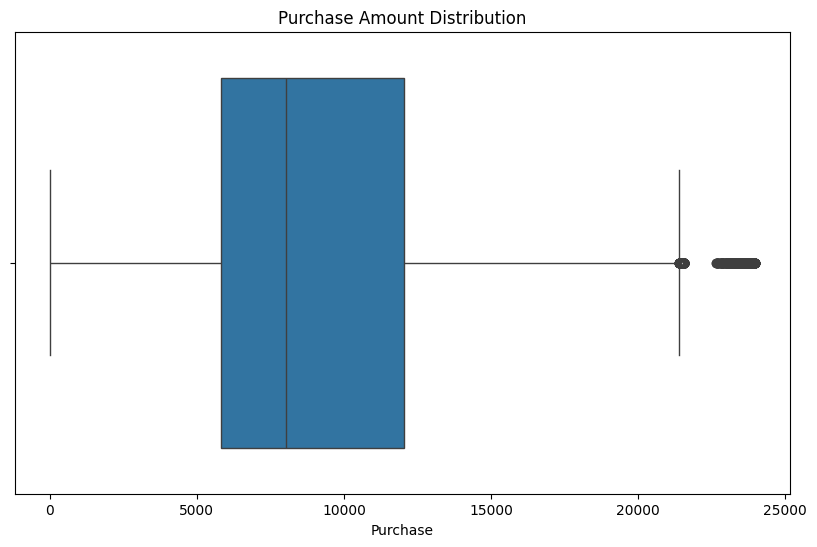

-----------------------------------------------------------------------
3. Gender Analysis
-----------------------------------------------------------------------

Average Purchase by Gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


<ipython-input-9-5bfdcb750fa7>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_means = df.groupby('Gender')['Purchase'].mean()


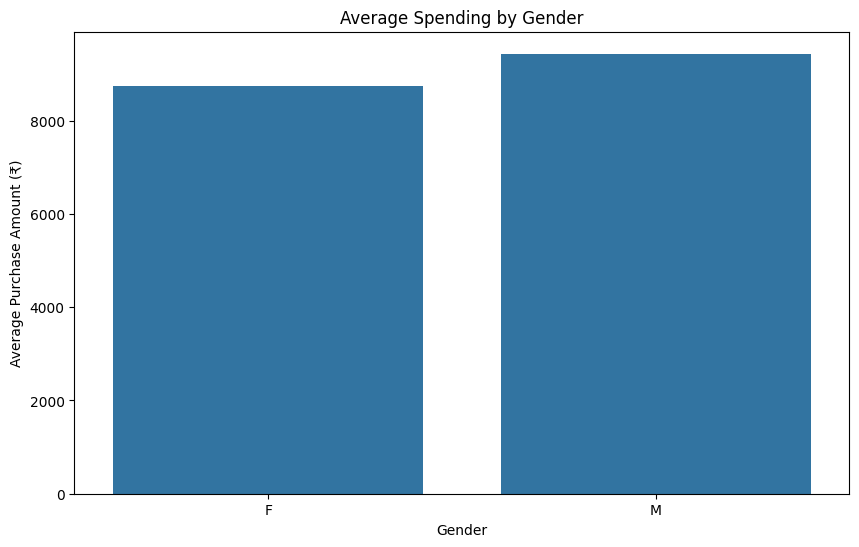

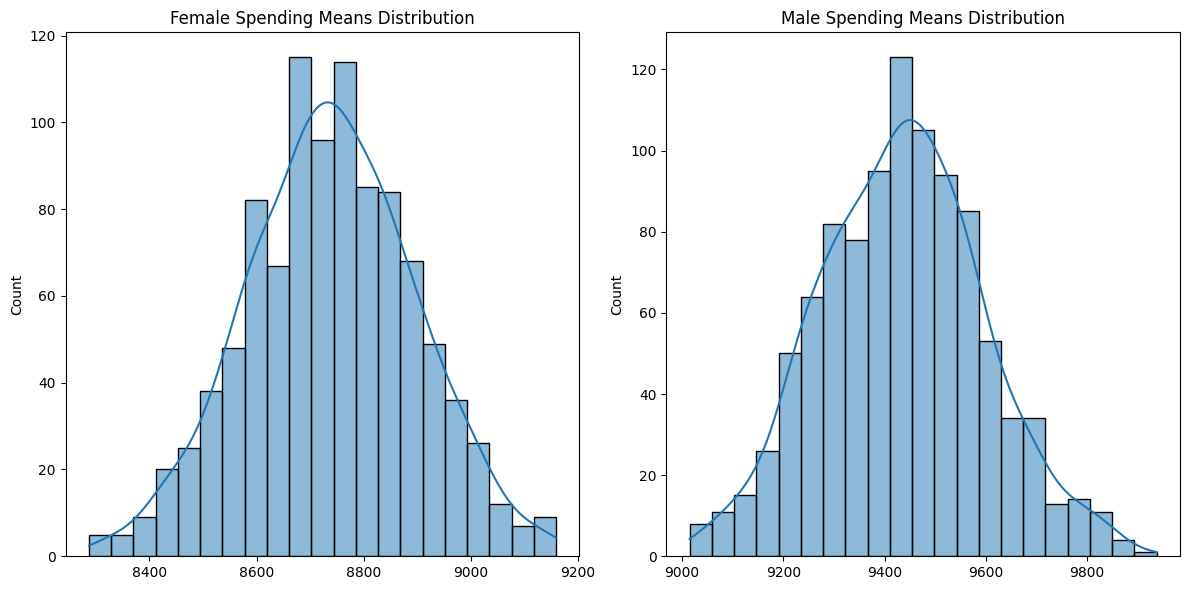


Confidence Intervals:

90.0% CI:
Female: ₹8731 - ₹8747
Male: ₹9426 - ₹9443

95.0% CI:
Female: ₹8729 - ₹8748
Male: ₹9425 - ₹9445

99.0% CI:
Female: ₹8726 - ₹8752
Male: ₹9422 - ₹9448
-----------------------------------------------------------------------
4. Marital Status Analysis
-----------------------------------------------------------------------


<ipython-input-9-5bfdcb750fa7>:79: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  married_means = df.groupby('Marital_Status')['Purchase'].mean()


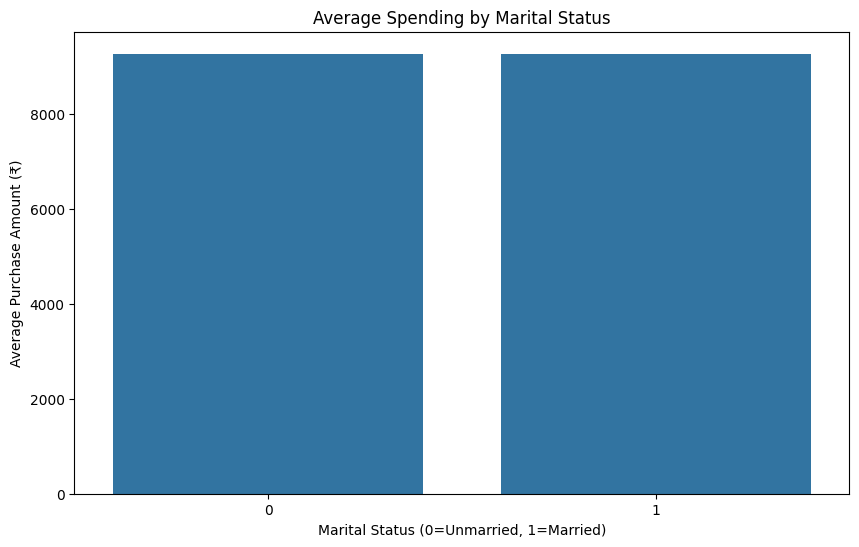

-----------------------------------------------------------------------
5. Age Group Analysis
-----------------------------------------------------------------------


<ipython-input-9-5bfdcb750fa7>:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_means = df.groupby('Age')['Purchase'].mean().reindex(age_order)


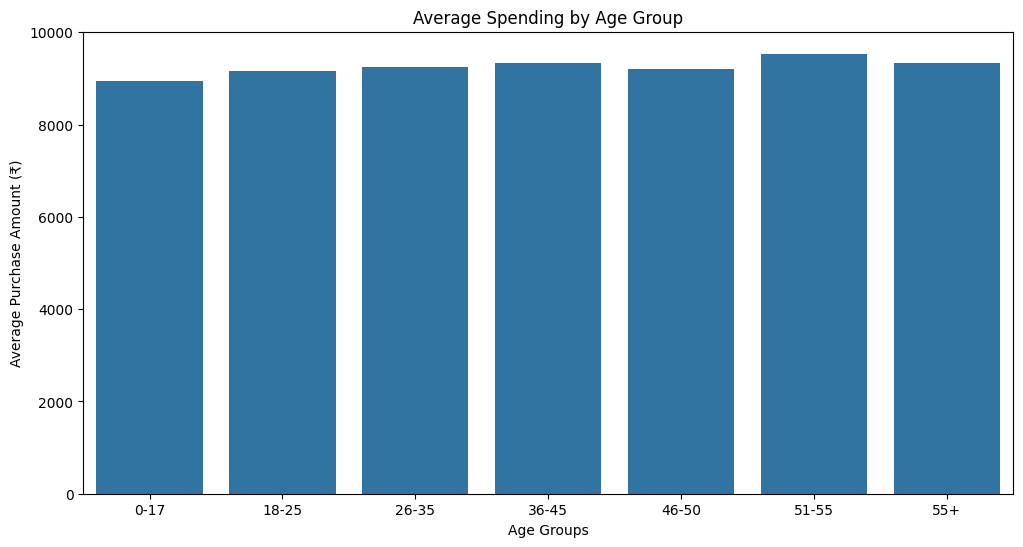

-----------------------------------------------------------------------
Combined Visualization
-----------------------------------------------------------------------


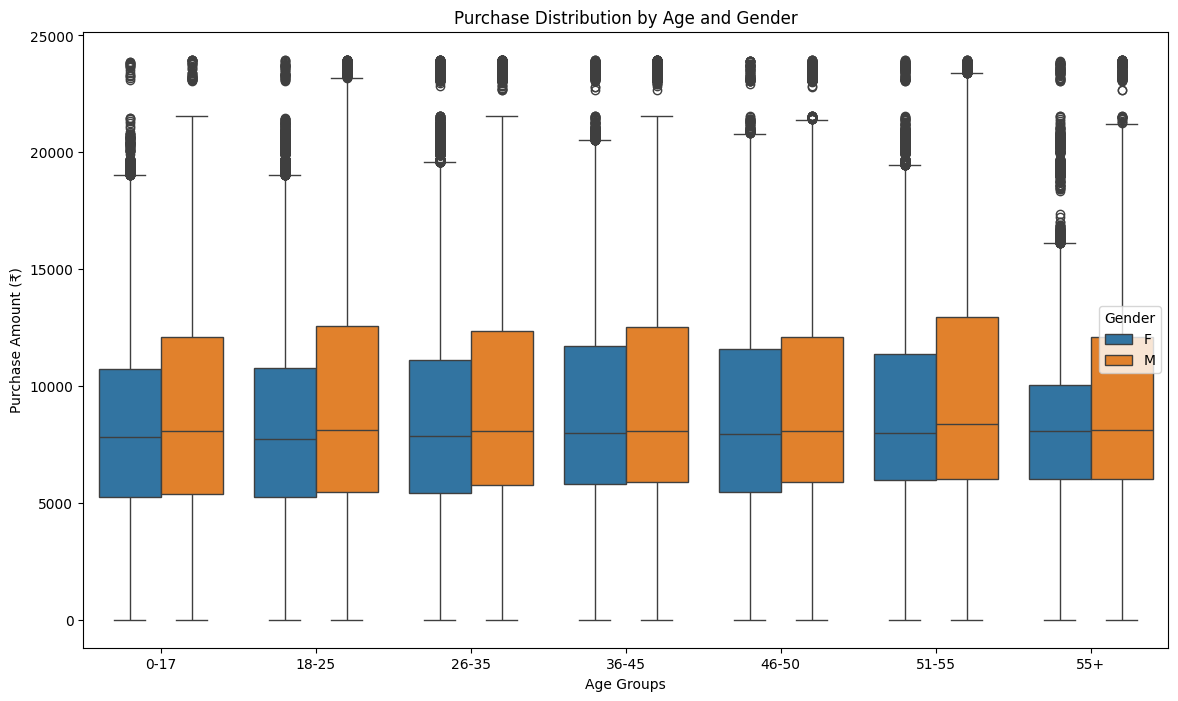

In [9]:
print("-----------------------------------------------------------------------")
print("1. Initial Data Analysis")
print("-----------------------------------------------------------------------")
print("Data Structure:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

print("Convert categorical columns")
cat_cols = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
df[cat_cols] = df[cat_cols].astype('category')

print("-----------------------------------------------------------------------")
print("2. Missing Values & Outliers")
print("-----------------------------------------------------------------------")
print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Purchase'])
plt.title('Purchase Amount Distribution')
plt.show()

print("-----------------------------------------------------------------------")
print("3. Gender Analysis")
print("-----------------------------------------------------------------------")
gender_means = df.groupby('Gender')['Purchase'].mean()
print("\nAverage Purchase by Gender:")
print(gender_means)

plt.figure(figsize=(10,6))
sns.barplot(x=gender_means.index, y=gender_means.values)
plt.title('Average Spending by Gender')
plt.ylabel('Average Purchase Amount (₹)')
plt.show()

# CLT Implementation
def calculate_ci(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return mean, mean-h, mean+h

# Female Sampling Distribution
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

np.random.seed(42)
female_means = [np.mean(np.random.choice(female_purchases, 1000)) for _ in range(1000)]
male_means = [np.mean(np.random.choice(male_purchases, 1000)) for _ in range(1000)]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(female_means, kde=True)
plt.title('Female Spending Means Distribution')
plt.subplot(1,2,2)
sns.histplot(male_means, kde=True)
plt.title('Male Spending Means Distribution')
plt.tight_layout()
plt.show()

# Confidence Intervals
conf_levels = [0.90, 0.95, 0.99]

print("\nConfidence Intervals:")
for level in conf_levels:
    f_mean, f_low, f_high = calculate_ci(female_means, level)
    m_mean, m_low, m_high = calculate_ci(male_means, level)
    print(f"\n{level*100}% CI:")
    print(f"Female: ₹{f_low:.0f} - ₹{f_high:.0f}")
    print(f"Male: ₹{m_low:.0f} - ₹{m_high:.0f}")

print("-----------------------------------------------------------------------")
print("4. Marital Status Analysis")
print("-----------------------------------------------------------------------")
married_means = df.groupby('Marital_Status')['Purchase'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=married_means.index, y=married_means.values)
plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status (0=Unmarried, 1=Married)')
plt.ylabel('Average Purchase Amount (₹)')
plt.show()

print("-----------------------------------------------------------------------")
print("5. Age Group Analysis")
print("-----------------------------------------------------------------------")
age_order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
age_means = df.groupby('Age')['Purchase'].mean().reindex(age_order)

plt.figure(figsize=(12,6))
sns.barplot(x=age_means.index, y=age_means.values)
plt.title('Average Spending by Age Group')
plt.ylabel('Average Purchase Amount (₹)')
plt.xlabel('Age Groups')
plt.show()

print("-----------------------------------------------------------------------")
print("Combined Visualization")
print("-----------------------------------------------------------------------")
plt.figure(figsize=(14,8))
sns.boxplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.title('Purchase Distribution by Age and Gender')
plt.ylabel('Purchase Amount (₹)')
plt.xlabel('Age Groups')
plt.legend(title='Gender')
plt.show()

### Key Visualizations Generated:

1. **Purchase Distribution Boxplot**:
   - Shows spread of purchase amounts
   - Identifies outliers in spending

2. **Gender Spending Comparison**:
   - Bar chart comparing male vs female average spending
   - Histograms showing distribution of sample means (CLT)

3. **Marital Status Analysis**:
   - Bar chart comparing married vs unmarried spending

4. **Age Group Analysis**:
   - Bar chart showing spending patterns across age groups
   - Combined boxplot showing age/gender interactions

5. **Confidence Interval Results**:
   - Printed confidence intervals for different confidence levels
   - Histograms demonstrating sampling distribution normality

### Conclusion:
1. Gender plots will clearly show if male/female confidence intervals overlap
2. Age group bars will reveal peak spending categories
3. Marital status chart shows relationship between marriage and spending
4. Combined boxplot helps identify demographic intersections with high spending